In [1]:
using PyPlot
push!(LOAD_PATH, "../../FlyDi.jl/src")
using FlyDi

In [2]:
fil = "../data/quad.h5"
r0 = Vector([-0.0155, -0.008, 0.0]); # coord of pa grid [1, 1] (meters)
fa = h5read_pa(fil, r0);

In [3]:
# calculation
DT = 2e-8
MAX_ITERATIONS = Int64(1e6)
# particle
MASS = 4.002602 * u
n = 35
k = 35
DIPOLE = (3.0 / 2.0) * n * k * q * a0
# electrodes 
voltages = Vector([200.0, -200.0, 200.0, -200.0]);

In [4]:
t0 = 0.0
r0 = Vector([0.001, 0.00, 0.19])
v0 = Vector([-5, 30, -1200.0])
@time tr = traj(fa, voltages, t0, r0, v0, DIPOLE, MASS, DT, rk4, max_t=125e-6);

  8.388440 seconds (29.04 M allocations: 2.662 GiB, 6.58% gc time)


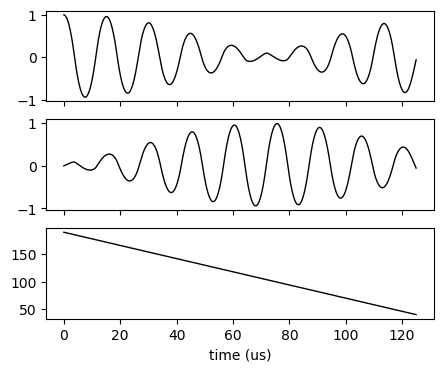

In [5]:
fig, ax = subplots(3, 1, figsize=(5, 4), sharex=true)
ax[1, 1].plot(tr[:, 1]*1e6, tr[:, 2]*1e3, color="black", lw=1)
ax[2, 1].plot(tr[:, 1]*1e6, tr[:, 3]*1e3, color="black", lw=1)
ax[3, 1].plot(tr[:, 1]*1e6, tr[:, 4]*1e3, color="black", lw=1)
xlabel("time (us)")
;

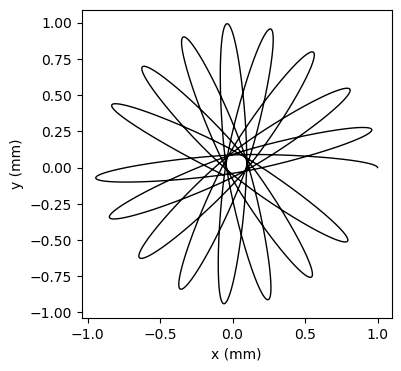

In [6]:
fig, ax = subplots(figsize=(4, 4))
plot(tr[:, 2]*1e3, tr[:, 3]*1e3, color="black", lw=1)
xlabel("x (mm)")
ylabel("y (mm)")
;